In [1]:
from scripts.ClusterTS_MDS import ClusterVTECDataMDS
from numpy import loadtxt, float64

from matplotlib import rcParams

rcParams.update({
    "text.usetex": True
})

In [2]:
PTEX_dissim = loadtxt("./data/PTEX_DTW_matrix.dat", dtype= float64, delimiter = ",")

In [3]:
MDS_methods = ("SMACOF-euclidean-classic", "SMACOF-dissim-classic")
cluster_methods = ("K-Means", "Gaussian")
number_dims = tuple(range(2, 4))
number_clusters = tuple(range(2, 11))

TEC_ClusterSeries = ClusterVTECDataMDS(dissimilarity = PTEX_dissim)

metrics_SMACOF_euclidean_classic_results = dict()
metrics_SMACOF_dtw_classic_results = dict()

In [4]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def GetClusteringMetrics(Xc, num_clusters, cluster_method = "K-Means"):
    if cluster_method == "K-Means":
        KMeans_Cluster_TS = KMeans(n_clusters = num_clusters, init = "k-means++", max_iter = 500)
        Labels = KMeans_Cluster_TS.fit_predict(Xc)
        
    elif cluster_method == "Gaussian":
        GaussianMix_Cluster_TS = GaussianMixture(n_components = num_clusters, covariance_type = "full", init_params="k-means++", max_iter = 500)
        Labels = GaussianMix_Cluster_TS.fit_predict(Xc)

    SH_score_Xc = silhouette_score(Xc, Labels)
    CH_score_Xc = calinski_harabasz_score(Xc, Labels)
    DB_score_Xc = davies_bouldin_score(Xc, Labels)

    return {"Silhouette": SH_score_Xc, "Calinski–Harabasz ": CH_score_Xc, "Davies-Boulding":DB_score_Xc}

## SMACOF utilizando matriz DTW y matriz euclidiana por factor de corrección con base a solución MDS clásica

SMACOF-euclidean-classic with 2 components has a stress-1 value of 0.102657
--Scores with K-Means clustering--
SH coefficient = 0.653716847598264
CH index = 7846.164704286965
DB index = 0.5818638581821219
--Total series for every cluster--
0 -> 1875
1 -> 2464
--Scores with K-Means clustering--
SH coefficient = 0.7130860986059877
CH index = 12206.295788390798
DB index = 0.45085442492812744
--Total series for every cluster--
0 -> 621
1 -> 2450
2 -> 1268
--Scores with K-Means clustering--
SH coefficient = 0.5913127026210453
CH index = 10338.522330365251
DB index = 0.6061523216718425
--Total series for every cluster--
0 -> 619
1 -> 1836
2 -> 1250
3 -> 634
--Scores with K-Means clustering--
SH coefficient = 0.5835074877947812
CH index = 11351.294636414357
DB index = 0.6664507370580967
--Total series for every cluster--
0 -> 1827
1 -> 637
2 -> 169
3 -> 1097
4 -> 609
--Scores with K-Means clustering--
SH coefficient = 0.5210959544472675
CH index = 9818.594150408528
DB index = 0.77075791053310

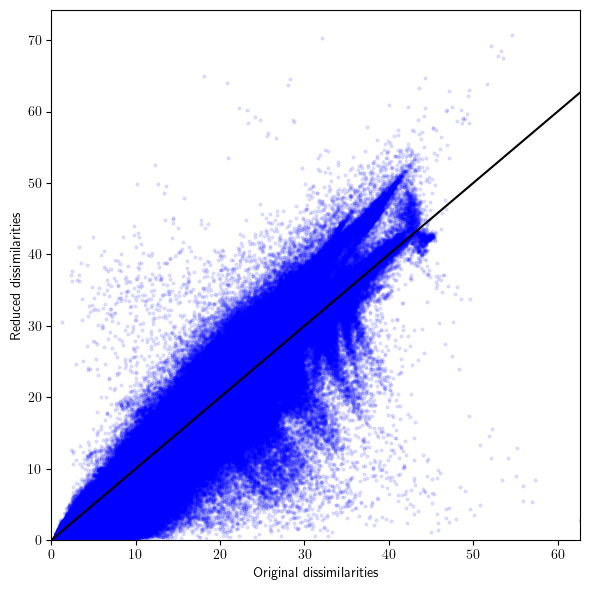

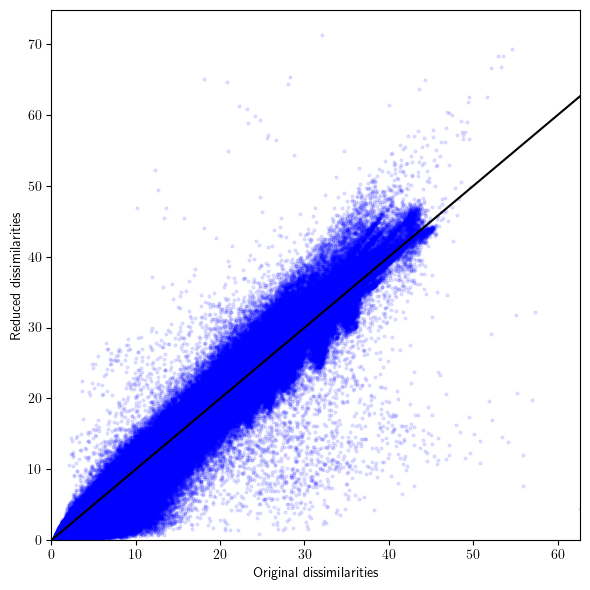

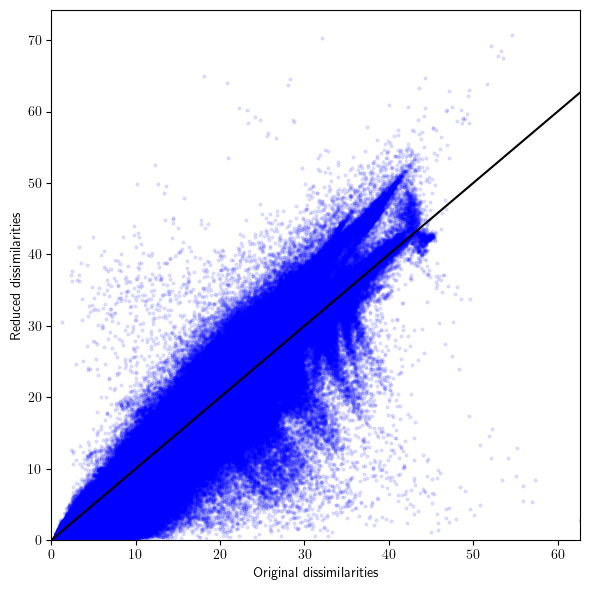

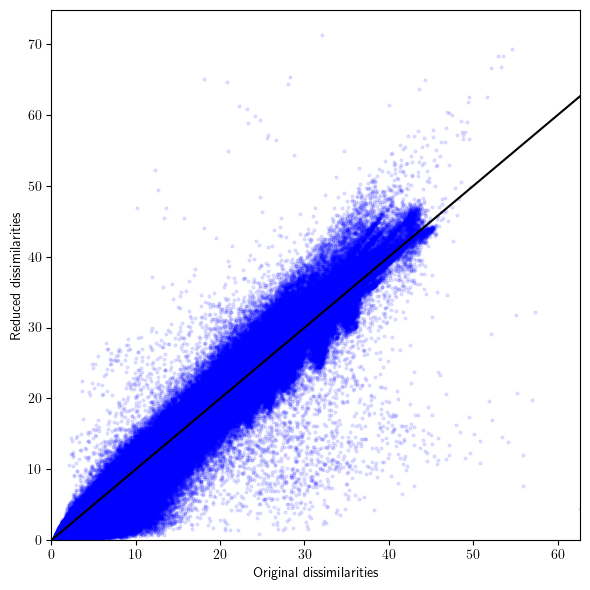

In [5]:
for MDS_method in MDS_methods:
    for num_dims in number_dims:
        TEC_ClusterSeries.ComputeMDS(num_comps_mds = num_dims, method = MDS_method, max_iter = 1000, eps = 1e-6, verbose = 0, visualize_shepard = False)

        for cluster_method in cluster_methods:
            for num_cluster in number_clusters:
                TEC_ClusterSeries.ClusterTSVectors(num_clusters = num_cluster, cluster_method = cluster_method)
                cluster_metrics = GetClusteringMetrics(TEC_ClusterSeries.Xc_TS, num_cluster, cluster_method)
                
                if MDS_method == MDS_methods[0]:
                    metrics_SMACOF_euclidean_classic_results[cluster_method + f"-{num_dims}-{num_cluster}"] = cluster_metrics
                else:
                    metrics_SMACOF_dtw_classic_results[cluster_method + f"-{num_dims}-{num_cluster}"] = cluster_metrics

## Metricas de evaluación

In [6]:
from pandas import DataFrame

# Function to highlight min and max values within a block of N rows
def highlight_min_max(df_block):
    # Find min and max per column within the block
    min_vals = df_block.min()
    max_vals = df_block.max()

    # Create a DataFrame for styling with empty strings
    df_style = DataFrame('', index=df_block.index, columns=df_block.columns)

    # Apply the styles
    df_style[df_block == min_vals] = 'background-color: blue'  # Min
    df_style[df_block == max_vals] = 'background-color: red'  # Max

    return df_style

# Function to apply highlighting for blocks of N rows
def apply_highlight_in_blocks(df, N):
    # Create an empty DataFrame for styling
    style_df = DataFrame('', index=df.index, columns=df.columns)

    # Split DataFrame into blocks of N rows and apply highlight_min_max to each block
    for start in range(0, len(df), N):
        end = start + N
        block = df.iloc[start:end]
        
        # Apply the highlighting function to each block and assign it to the style DataFrame
        style_df.iloc[start:end] = highlight_min_max(block)

    return df.style.apply(lambda _: style_df, axis=None)

In [7]:
num_row_sep = len(number_clusters)

In [8]:
metrics_SMACOF_euclidean_classic_results = DataFrame(metrics_SMACOF_euclidean_classic_results)
styled_metrics_DTW = apply_highlight_in_blocks(metrics_SMACOF_euclidean_classic_results.T, num_row_sep)
styled_metrics_DTW

,Silhouette,Calinski–Harabasz,Davies-Boulding
K-Means-2-2,0.653717,7846.164704,0.581864
K-Means-2-3,0.713086,12206.295788,0.450854
K-Means-2-4,0.687998,11101.382309,0.576077
K-Means-2-5,0.582697,11351.414018,0.667333
K-Means-2-6,0.578601,9763.663678,0.803937
K-Means-2-7,0.524647,10601.080646,0.750507
K-Means-2-8,0.469448,10079.844558,0.808488
K-Means-2-9,0.496124,9325.367381,0.801185
K-Means-2-10,0.418717,9235.022810,0.804600
Gaussian-2-2,0.558246,5189.026180,0.640563


In [9]:
metrics_SMACOF_dtw_classic_results = DataFrame(metrics_SMACOF_dtw_classic_results)
styled_metrics_DTW_Classic = apply_highlight_in_blocks(metrics_SMACOF_dtw_classic_results.T, num_row_sep)
styled_metrics_DTW_Classic

,Silhouette,Calinski–Harabasz,Davies-Boulding
K-Means-2-2,0.653717,7846.156415,0.582035
K-Means-2-3,0.713086,12206.295788,0.450854
K-Means-2-4,0.688569,11101.298790,0.574773
K-Means-2-5,0.582839,11351.466678,0.667085
K-Means-2-6,0.589629,9805.709956,0.678829
K-Means-2-7,0.524150,10599.603397,0.751919
K-Means-2-8,0.535322,10092.243047,0.727683
K-Means-2-9,0.495634,9322.314034,0.803346
K-Means-2-10,0.441659,9316.180586,0.846746
Gaussian-2-2,0.561216,5245.225773,0.638958
